# Etude sur Decision Tree Classifier, Hyperparamètres et Botanique. Deuxième partie.

# 2 Cross validation k-fold CV

## Importation des librairies

Pour l'analyse des donnée, nous aurons besoin de la librairie "pandas" pour lire et manipuler les fichiers; la librairie "numpy" pour tous ceux qui est calcul mathématiques; et la librairie "matplotlib.pyplot" et "seaborn"pour la visualisation de données.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

## Chargement des données

In [2]:
iris = datasets.load_iris(as_frame=True)
iris["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [3]:
iris_mod = iris.frame.copy()
iris_mod

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
data = iris_mod.iloc[:,2:-1]

In [5]:
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
# X input data, t target data
X, t = iris_mod.iloc[:,2:-1].to_numpy(), iris_mod.iloc[:,-1].to_numpy()
X.shape, t.shape

((150, 2), (150,))

# echantilloage des données

Split data into 3 (train, validation, test)

First, I split data into 2 (train_val, test, 80:20) : test samples = 30

In [7]:
X_train_val, X_test, t_train_val, t_test = train_test_split(X, t, test_size=0.2, stratify=t, random_state=42)

In [8]:
X_train_val.shape, X_test.shape, t_train_val.shape, t_test.shape

((120, 2), (30, 2), (120,), (30,))

In [9]:
"""t_train_val=np.reshape(t_train_val.shape[0],1)
t_train_val.shape"""

't_train_val=np.reshape(t_train_val.shape[0],1)\nt_train_val.shape'

Second, I split X_train_val, t_train_val into 2 (train, val, 80:40) with k=3

To round all the data, I create 3 groupes for grid search manually

X_train_1, X_val_1, t_train_1, t_val_1

X_train_2, X_val_2, t_train_2, t_val_2

X_train_3, X_val_3, t_train_3, t_val_3

In [10]:
X_train_1, X_val_1, t_train_1, t_val_1 = train_test_split(X_train_val, t_train_val, test_size=40, stratify=t_train_val, random_state=42)

In [11]:
X_train_1.shape

(80, 2)

In [12]:
X_train_2a, X_val_2, t_train_2a, t_val_2 = train_test_split(X_train_1, t_train_1, test_size=40, stratify=t_train_1, random_state=42)

In [13]:
# create X_train_2 and t_train_2.
# X_train_2 = X_train_2a + X_val_1
# t_train_2 = t_train_2a + t_val_1

aX_2 = np.array(X_train_2a)
bX_2 = np.array(X_val_1)
X_train_2 = np.concatenate([aX_2,bX_2])

at_2 = np.array(t_train_2a)
bt_2 = np.array(t_val_1)
t_train_2 = np.concatenate([at_2,bt_2])

In [14]:
# pd.DataFrame(X_train_3)

In [15]:
# X_val_3 = X_train_2a
# X_train_3 = X_val_1 + X_val_2

X_val_3 = X_train_2a
t_val_3 = t_train_2a

aX_3 = np.array(X_val_2)
at_3 = np.array(t_val_2)

X_train_3 = np.concatenate([aX_3,bX_2])
t_train_3 = np.concatenate([at_3,bt_2])

In [16]:
X_train_3.shape

(80, 2)

# affichage de la distribution des données

J'ai vérifié le proportion de données avant et après l'echantillonage.

In [17]:
iris_mod.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

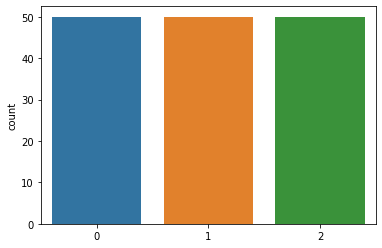

In [18]:
sns.countplot(x=t);

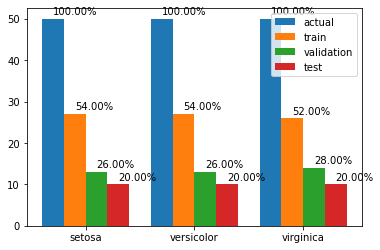

In [19]:
n, bins, patches = plt.hist([t, t_train_1, t_val_1, t_test], label=['actual', 'train', 'validation', 'test'], bins=np.arange(4)-0.5)
plt.legend(loc='upper right')
plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
#n, bins, patches = plt.hist([y, y_train, y_test], label=['initial', 'jeu de train', 'jeu de test'], bins=np.arange(3) - 0.5)

total_0 = iris_mod.target.value_counts()[0]
total_1 = iris_mod.target.value_counts()[1]
total_2 = iris_mod.target.value_counts()[2]

for patch in patches:
    width_0, height_0 = patch[0].get_width(), patch[0].get_height()
    x_text_0, y_text_0 = patch[0].get_xy()
    width_1, height_1 = patch[1].get_width(), patch[1].get_height()
    x_text_1, y_text_1 = patch[1].get_xy()
    width_2, height_2 = patch[2].get_width(), patch[2].get_height()
    x_text_2, y_text_2 = patch[2].get_xy()
    
    plt.annotate("{:.2%}".format(height_0/total_0), xy = (x_text_0 + width_0/2 , y_text_0 + height_0 + 1))
    plt.annotate("{:.2%}".format(height_1/total_1), xy = (x_text_1 + width_1/2 , y_text_1 + height_1 + 1))
    plt.annotate("{:.2%}".format(height_2/total_2), xy = (x_text_2 + width_2/2 , y_text_2 + height_2 + 1))

plt.show()

Remarques:
    J'ai constaté que les données sont bien echantillonés.

# automatisation l'apprentissage du modèle avec grid search et 3-fold CV sans scikit-learn routine

Implémentez ensuite un deuxième Jupyter Notebook, selon le même plan que précédemment, mais en effectuant cette fois-ci une "k-fold cross-validation" avec k égal à 3.

NB il est toujours ++formellement prohibé++ d'utiliser les routines de scikit-learn, à la fois pour la recherche par grille comme pour la mise en place de la "3-fold cross-validation".

Evaluer et afficher ensuite les performances sur les différents jeux de données.

X_train_1, X_val_1, t_train_1, t_val_1

X_train_2, X_val_2, t_train_2, t_val_2

X_train_3, X_val_3, t_train_3, t_val_3

In [20]:
# J'ai entrainé le modèle avec max_depth=2

model = tree.DecisionTreeClassifier(random_state=42, max_depth=2)

In [21]:
#pd.DataFrame(X_train)

In [22]:
#pd.DataFrame(X_val)

In [23]:
model.fit(X_train_1, t_train_1)
score_train = model.score(X_train_1, t_train_1)
score_val = model.score(X_val_1, t_val_1)
score_test = model.score(X_test, t_test)
print(f'Train score: {score_train}')
print(f'validation score: {score_val}')
print(f'Test score: {score_test}')

Train score: 0.9875
validation score: 0.925
Test score: 0.9333333333333333


In [24]:
X_val_1.shape

(40, 2)

In [25]:
model.fit(X_train_2, t_train_2)
score_train_2 = model.score(X_train_2, t_train_2)
score_val_2 = model.score(X_val_2, t_val_2)
score_test = model.score(X_test, t_test)
print(f'Train score: {score_train_2}')
print(f'validation score: {score_val_2}')
print(f'Test score: {score_test}')

Train score: 0.9625
validation score: 0.95
Test score: 0.9333333333333333


In [26]:
model.fit(X_train_3, t_train_3)
score_train_3 = model.score(X_train_3, t_train_3)
score_val_3 = model.score(X_val_3, t_val_3)
score_test = model.score(X_test, t_test)
print(f'Train score: {score_train_3}')
print(f'validation score: {score_val_3}')
print(f'Test score: {score_test}')

Train score: 0.9625
validation score: 0.975
Test score: 0.9333333333333333


### 3-fold cross validation manually

In [27]:
scores_train_1 = {}
scores_val_1 = {}
scores_test_1 = {}
scores_train_2 = {}
scores_val_2 = {}
scores_test_2 = {}
scores_train_3 = {}
scores_val_3 = {}
scores_test_3 = {}
avg_scores_train = {}
avg_scores_val = {}
avg_scores_test = {}
for d in range(2,11) : 
    #for k in range(1,4):
    model = tree.DecisionTreeClassifier(random_state=42, max_depth=d)
    model.fit(X_train_1, t_train_1)
    scores_train_1[d] = model.score(X_train_1, t_train_1)
    scores_val_1[d] = model.score(X_val_1, t_val_1)
    scores_test_1[d] = model.score(X_test, t_test)
    print("max_depth =", d)
    print(f'Train score 1: {scores_train_1}')
    print(f'validation score 1: {scores_val_1}')
    print(f'Test score 1: {scores_test_1}')
    print("")
    model.fit(X_train_2, t_train_2)
    scores_train_2[d] = model.score(X_train_2, t_train_2)
    scores_val_2[d] = model.score(X_val_2, t_val_2)
    scores_test_2[d] = model.score(X_test, t_test)
    print(f'Train score 2: {scores_train_2}')
    print(f'validation score 2: {scores_val_2}')
    print(f'Test score 2: {scores_test_2}')
    print("")
    model.fit(X_train_3, t_train_3)
    scores_train_3[d] = model.score(X_train_3, t_train_3)
    scores_val_3[d] = model.score(X_val_3, t_val_3)
    scores_test_3[d] = model.score(X_test, t_test)
    print(f'Train score 3: {scores_train_3}')
    print(f'validation score 3: {scores_val_3}')
    print(f'Test score 3: {scores_test_3}')
    print("")
    avg_scores_train[d] = (scores_train_1[d] + scores_train_2[d] + scores_train_1[d])/3
    avg_scores_val[d] = (scores_val_1[d] + scores_val_2[d] + scores_val_1[d])/3
    avg_scores_test[d] = (scores_test_1[d] + scores_test_2[d] + scores_test_1[d])/3
    print(f'avarage Train score: {avg_scores_train}')
    print(f'avarage Validation score: {avg_scores_val}')
    print(f'avarage Test score: {avg_scores_test}')
    print("")

max_depth = 2
Train score 1: {2: 0.9875}
validation score 1: {2: 0.925}
Test score 1: {2: 0.9333333333333333}

Train score 2: {2: 0.9625}
validation score 2: {2: 0.95}
Test score 2: {2: 0.9333333333333333}

Train score 3: {2: 0.9625}
validation score 3: {2: 0.975}
Test score 3: {2: 0.9333333333333333}

avarage Train score: {2: 0.9791666666666666}
avarage Validation score: {2: 0.9333333333333332}
avarage Test score: {2: 0.9333333333333332}

max_depth = 3
Train score 1: {2: 0.9875, 3: 1.0}
validation score 1: {2: 0.925, 3: 0.925}
Test score 1: {2: 0.9333333333333333, 3: 0.9666666666666667}

Train score 2: {2: 0.9625, 3: 0.9625}
validation score 2: {2: 0.95, 3: 0.95}
Test score 2: {2: 0.9333333333333333, 3: 0.9333333333333333}

Train score 3: {2: 0.9625, 3: 0.975}
validation score 3: {2: 0.975, 3: 0.975}
Test score 3: {2: 0.9333333333333333, 3: 0.9333333333333333}

avarage Train score: {2: 0.9791666666666666, 3: 0.9874999999999999}
avarage Validation score: {2: 0.9333333333333332, 3: 0.93

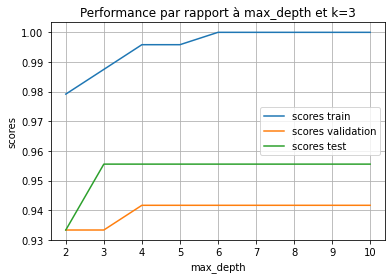

In [28]:
p1=plt.plot(avg_scores_train.values())
p2=plt.plot(avg_scores_val.values())
p3=plt.plot(avg_scores_test.values())
plt.title("Performance par rapport à max_depth et k=3")
plt.xlabel("max_depth")
plt.ylabel("scores")
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8], list(avg_scores_test.keys()))
plt.legend((p1[0],p2[0],p3[0]),("scores train","scores validation", "scores test"))
plt.show()

In [29]:
print(f'avarage Train score: {avg_scores_train}')
print("")
print(f'avarage Validation score: {avg_scores_val}')
print("")
print(f'avarage Test score: {avg_scores_test}')

avarage Train score: {2: 0.9791666666666666, 3: 0.9874999999999999, 4: 0.9958333333333332, 5: 0.9958333333333332, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0}

avarage Validation score: {2: 0.9333333333333332, 3: 0.9333333333333332, 4: 0.9416666666666668, 5: 0.9416666666666668, 6: 0.9416666666666668, 7: 0.9416666666666668, 8: 0.9416666666666668, 9: 0.9416666666666668, 10: 0.9416666666666668}

avarage Test score: {2: 0.9333333333333332, 3: 0.9555555555555556, 4: 0.9555555555555556, 5: 0.9555555555555556, 6: 0.9555555555555556, 7: 0.9555555555555556, 8: 0.9555555555555556, 9: 0.9555555555555556, 10: 0.9555555555555556}


## Focus sur le meilleur modele

In [ ]:
#focus sur le model à la meilleur profondeur
best_model= decisiontreeclass(42, max_depth=best_depth)

# automatisation l'apprentissage du modèle avec GridSearchCV() et 3-fold CV

Vous pouvez maintenant ré-implémenter la recherche par grille de l'hyperparamètre selon un schéma de "3-fold cross-validation" en utilisant la fonction GridSearchCV() de scikit-learn. Cette fonction est redoutable, elle va changer à jamais votre carrière de Développeur.e en Intelligence Artificielle !

### modéle avec DecisionTreeClassifier()

In [51]:
# estimator is the model

estimator = DecisionTreeClassifier()

# params_grid is Range to search for hyperparameters

hyper_parameters_grid = [{ 
    'max_depth': list(range(1, 10)), 
}]

# cv is K
cv = 3

# declaration de model

clf = GridSearchCV(estimator = estimator, 
                           param_grid=hyper_parameters_grid,
                           cv=cv,
                           return_train_score=True)

# train and validate the model

clf.fit(X_train_val, t_train_val)

# to see the performance (result)"
#cv=cross_validate(clf, X_train_val, t_train_val)
#print(cv)


# the result is in cv_results_. To see better, changed to dataframe

results=pd.DataFrame(clf.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.002661,0.005333,0.002669,0.002671,0.002667,0.005342,0.0,0.00267,0.0
std_fit_time,0.003763,0.003771,0.003775,0.003778,0.003772,0.003778,0.0,0.003776,0.0
mean_score_time,0.0,0.0,0.0,0.002663,0.0,0.0,0.002669,0.0,0.0
std_score_time,0.0,0.0,0.0,0.003766,0.0,0.0,0.003775,0.0,0.0
param_max_depth,1,2,3,4,5,6,7,8,9
params,{'max_depth': 1},{'max_depth': 2},{'max_depth': 3},{'max_depth': 4},{'max_depth': 5},{'max_depth': 6},{'max_depth': 7},{'max_depth': 8},{'max_depth': 9}
split0_test_score,0.675,0.925,0.95,0.975,0.975,0.95,0.975,0.95,0.975
split1_test_score,0.65,0.925,0.925,0.925,0.925,0.925,0.925,0.925,0.925
split2_test_score,0.65,0.95,1.0,0.95,0.95,0.975,0.95,0.95,0.975
mean_test_score,0.658333,0.933333,0.958333,0.95,0.95,0.95,0.95,0.941667,0.958333


validation score vs max_depth 0    0.658333
1    0.933333
2    0.958333
3    0.950000
4    0.950000
5    0.950000
6    0.950000
7    0.941667
8    0.958333
Name: mean_test_score, dtype: float64


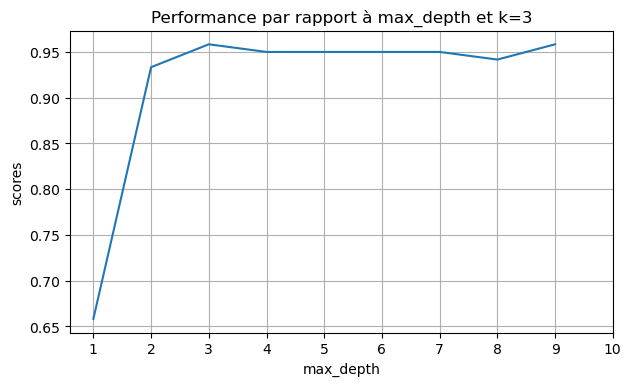

In [52]:
plt.figure(figsize=(7, 4), dpi=100)
p=plt.plot(results.mean_test_score)
plt.title("Performance par rapport à max_depth et k=3")
plt.xlabel("max_depth")
plt.ylabel("scores")
plt.grid(True)
#plt.xticks([1,2,3,4,5,6,7,8,9,10], list(t.mean_test_score.keys()))
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
#plt.legend((p1[0],p2[0],p3[0]),("scores train","scores validation", "scores test"))
print('validation score vs max_depth', results.mean_test_score)
plt.show()

In [32]:
# to see the best hyperparameters

clf.best_params_

{'max_depth': 3}

In [33]:
# to see the best validation score

clf.best_score_

0.9583333333333334

In [34]:
# to see the best model

best_model = clf.best_estimator_
best_model

DecisionTreeClassifier(max_depth=3)

In [35]:
# Obtenez le modèle avec la meilleure score

print(f'train_val score: {best_model.score(X_train_val, t_train_val)}')
print(f'test score: {best_model.score(X_test, t_test)}')

train_val score: 0.9833333333333333
test score: 0.9666666666666667


## Conclusion pour DecisionTreeClassifier() avec GridSearchCV() et 3-fold CV de sklearn

    Le meilleur modèle avec DecisionTreeClassifier() est DecisionTreeClassifier(max_depth=3).
    Le meilleur train score est d 0.9833333333333333
    Le meilleur validation score est de 0.9583333333333334
    Le meilleur test socre est de       0.9666666666666667

## Matrix de confusion

In [ ]:
#cm = confusion_matrix(y_true, y_pred)


In [ ]:
best_model.pred(X_train_val)

# modéle avec KNeighborsClassifier() K-近傍法

J'ai vérifié le performance avec K-Nearest Neighbor Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# estimator is the model

estimator_n = KNeighborsClassifier()

# params_grid is Range to search for hyperparameters

param_grid_n = [{ 
    'n_neighbors': list(range(1, 10)), 
}]

# cv is K
cv = 3

# declaration de model

clf_n = GridSearchCV(estimator = estimator_n, 
                           param_grid=param_grid_n,
                           cv=cv,
                           return_train_score=False)

# train and validate the model

clf_n.fit(X_train_val, t_train_val)

# the result is in cv_results_. To see better, changed to dataframe

results_n=pd.DataFrame(clf_n.cv_results_).T
results_n

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.000993,0.000658,0.001007,0.0,0.000333,0.000334,0.000344,0.000658,0.0
std_fit_time,0.00001,0.000465,0.00003,0.0,0.000471,0.000473,0.000486,0.000465,0.0
mean_score_time,0.002674,0.001684,0.002337,0.002676,0.001999,0.002339,0.001989,0.001679,0.002009
std_score_time,0.00171,0.000465,0.000947,0.000955,0.00079,0.00048,0.000808,0.000937,0.000019
param_n_neighbors,1,2,3,4,5,6,7,8,9
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9}
split0_test_score,0.975,0.95,0.95,0.95,0.975,0.95,0.975,0.975,0.975
split1_test_score,0.9,0.95,0.95,0.95,0.925,0.925,0.925,0.925,0.925
split2_test_score,0.95,0.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean_test_score,0.941667,0.95,0.966667,0.966667,0.966667,0.958333,0.966667,0.966667,0.966667


In [38]:
# to see the best validation score

clf_n.best_score_

0.9666666666666667

In [39]:
# choix de la meilleur modéle

best_model_n = clf_n.best_estimator_
best_model_n

KNeighborsClassifier(n_neighbors=3)

In [40]:
# le meilleure score avec la meilleur modéle séléctionée par grid search

print(f'train_val score: {best_model_n.score(X_train_val, t_train_val)}')
print(f'test score: {best_model_n.score(X_test, t_test)}')

train_val score: 0.9666666666666667
test score: 0.9666666666666667


In [41]:
# score with grid search

print(f'train_val score: {best_model_n.score(X_train_val, t_train_val)}')
"""print("")
print(f'train_1 score: {best_model_n.score(X_train_1, t_train_1)}')
print(f'train_2 score: {best_model_n.score(X_train_2, t_train_2)}')
print(f'train_3 score: {best_model_n.score(X_train_3, t_train_3)}')
print("")
print(f'val_1 score: {best_model_n.score(X_val_1, t_val_1)}')
print(f'val_2 score: {best_model_n.score(X_val_2, t_val_2)}')
print(f'val_3 score: {best_model_n.score(X_val_3, t_val_3)}')"""
print("")
print(f'test score: {best_model_n.score(X_test, t_test)}')

train_val score: 0.9666666666666667

test score: 0.9666666666666667


## Conclusion pour KNeighborsClassifier() avec GridSearchCV() et 3-fold CV de sklearn

    Le meilleur modèle avec KNeighborsClassifier() est KNeighborsClassifier(n_neighbors=3).
    Le meilleur train score est de 0.9666666666666667
    Le meilleur validation score est de 0.9666666666666667
    Le meilleur test socre est de       0.9666666666666667

Random Forest